<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-4-Training-Models" data-toc-modified-id="Chapter-4-Training-Models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 4 Training Models</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Computational-Complexity" data-toc-modified-id="Computational-Complexity-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Computational Complexity</a></span></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Batch-Gradient-Descent" data-toc-modified-id="Batch-Gradient-Descent-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Batch Gradient Descent</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li><li><span><a href="#Bias/Variance-Tradeoff" data-toc-modified-id="Bias/Variance-Tradeoff-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bias/Variance Tradeoff</a></span></li><li><span><a href="#Regularized-Linear-Models" data-toc-modified-id="Regularized-Linear-Models-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Regularized Linear Models</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Elastic Net</a></span></li></ul></li></ul></li></ul></div>

# Chapter 4 Training Models

So far we have treated ML like a black box and you would be surprised with how much you can do without knowing what's under the hood.

However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently. Lastly, most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks (discussed in another part of this book).

In this chapter, we will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it:

* Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).

* Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.

Next, we will look at Polynomial Regression, a more complex model that can fit nonlinear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case.

Finally, we will look at two more models that are commonly used for classification tasks: 

* Logistic Regression

* Softmax Regression

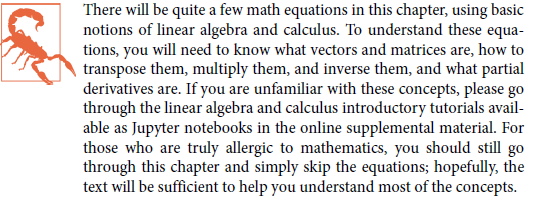

## Linear Regression

In chapter 1, we looked at a simple regression model of life satisfaction: 

**life_satisfaction** = $\theta_{0}+\theta_{1}$x$GDPpercapita$

This model is just a linear function of the input features where $\theta_{0}$ and $\theta_{1}$ are the model's parameters.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term / intercept*.

**Linear Regression model prediction**

$\hat{y}=\theta_{0}+\theta_{1}X_{1}+...\theta_{n}X_{n}$, where:

* $\hat{y}$ is the predicted value

* n is the number of features

* $X_{i}$ is the ith feature value

* $\theta_{j}$ is the jth model parameter

This can all be written more concisely in a vectorized form:

**Linear Regression (vectorized form)**

$\hat{y} = h_{\theta}(X) = \theta \cdot X$, where:

* $\theta$ is the models *parameter vector*

* x is the instance's feature vector

* $\theta \cdot X$ is the dot product of the vectors $\theta$ and $X$

* $h_{\theta}(X)$ is the hypothesis function using the model parameters $\theta$

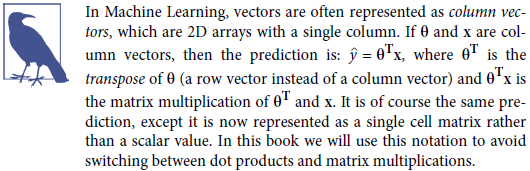

So, that's the linear regression model, but how do we train it?
First, we need a measure that tells us how well the models parameters fit the data. In Chapter 2, we saw that the most common performance measure of a regression model is the RMSE. In practice however, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and they both lead to the same result (*because a value that minimizes a function also minimizes its square root)

$ MSE(X, h_{\theta}) = (\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}$

### Computational Complexity



The normal equation computes the inverse of $X^{T}X$, which is an $(n+1) x (n+1)$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$

The SVD approach used by Scikit-Learn's **LinearRegression()** class is about $O(n^{2})$. If you double the amount of features, you multiply the computation time by about $4$.

Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features or too many training instances to fit into memory.

## Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling $\theta$ with random values (called *random initialization*), and then you improve it gradually, taking one step at a time, each step attempts to decrease the cost function (like the MSE), until the algorithm converges to a minimum.

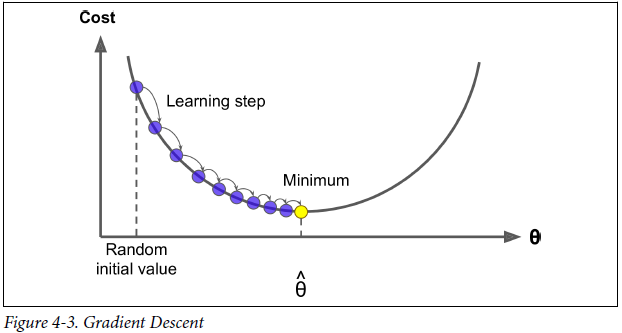

An important parameter in GD is the size of the steps, also called the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

It should be noted that not all cost functions look like nice parabolas. There may be holes, ridges, plateaus, and all sorts of irregular terrain, which makes converging to a global minimum that much more difficult.

Fortunately, the MSE cost function is *convex*, meaning if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are NOT any local minima and just one global minimum.

Considering that fact, GD is guaranteed to approach closely to the global minimum (if you wait long enough).

**Notes**

When using Gradient Descent, you should ensure that all of the features have a similar scale, or else it will take much longer to converge. (why tho?)

### Batch Gradient Descent

To implement Gradient Descent, you need to calculate how much the cost function will change if you change $\theta$ just a little bit. This is called a *partial derivative*

This equation compute the partial derivative of the cost function with regards to the parameter $\theta$:

$\dfrac{\partial J}{\partial \theta_0}=\frac{2}{m}\sum_{i=1}^{m}[y_i-\theta_0-\theta_1x_i]\cdot\left[-1 \right]$

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. 

**Gradient Descent Step**

$\theta^{(next step)} = \theta - \eta \nabla_{\theta}MSE(\theta)$

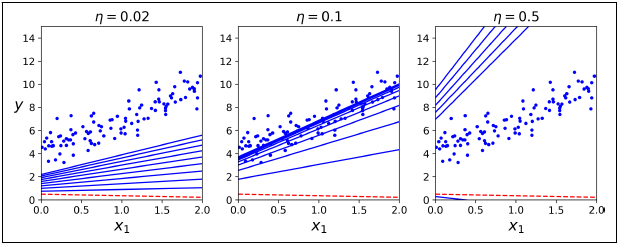

On the left, the learning rate is too low: it will converge but it will take a long time.

In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution.

On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and getting further away from the optimal solution.

To find a good learning rate, you can use a grid search. However, you may want to limit the number of iterations so that the grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny - that is, when its norm becomes smaller than a tiny number called $\epsilon$ (called the **tolerance**) - because this happens when Gradient Descent has almost reached the minimum.

### Stochastic Gradient Descent

The main problem with **Batch Gradient Descent** is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, **Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance**. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.7)
On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

Therefore, randomness is good to escape from local optima but bad because it means that the algorithm can never settle at the global minimum. One solution to this problem is to gradually reduce the learning rate. The steps start out large, then get smaller and smaller, allowing the algorithm to settle at the global minimum. The function that determines the learning rate at each iteration is called the **learning schedule**.

By convention, we iterate by rounds of $m$ iterations; each round is called an **epoch**.

To perform Linear Regression using SGD with Scikit-Learn, you can use the `SGDRegressor` class, which defaults to optimizing the squared error cost function. 

An example of linear regression where $\beta_{0}$ is 4 and $\beta_{1}$ is 3:

C:\Users\miqui\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\miqui\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


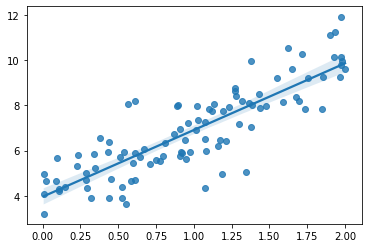

In [2]:
import numpy as np
import seaborn as sns
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.randn(100, 1)

sns.regplot(x = X, y = y)

Now, let's compute $\hat\theta$ using the Normal equation:

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.87393895]
 [3.14787496]]


We were hoping for 4 and 3, but we added some noise too don't forget.

Performing Linear Regression using Scikit-Learn is quite simple:

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X, y)
print(lm.intercept_)
print(lm.coef_)

[3.87393895]
[[3.14787496]]


To perform Linear Regression using SGD with Scikit-Learn, you can use the `SGDRegressor` class:

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_lm = SGDRegressor(max_iter=1000, tol=0.003, penalty=None, eta0=0.1).fit(X, y)
print(sgd_lm.intercept_)
print(sgd_lm.coef_)

[3.92854507]
[3.2635328]


C:\Users\miqui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| Algorithm | Large $m$ | Large $n$ | Hyperparams | Scaling Required | Scikit-Learn |
| --- | --- | --- | --- | --- | --- |
| Normal Equation | Fast | Slow | 0 | No | N/A
| SVD | Fast | Slow | 0 | No | LinearRegression
| Batch GD | Slow | Fast | 2 | Yes | SGDRegressor
| Stochastic GD | Fast | Fast | >2 | Yes | SGDRegressor
| Mini-batch GD | Fast | Fast | >2 | Yes | SGDRegressor

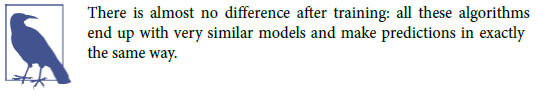

## Bias/Variance Tradeoff

A model's generalization error can be expressed as the sum of three very different types of errors:

**Bias**
    
    This part of the generalization error is due to wrong assumptions, like assuming the data is linear when it's actually quadratic. Most likely to under-fit the data.
    
**Variance**

    This part is due to the model's excessive sensitivity to small variations in the training data. Most likely to over-fit the data.
    
**Irreducible error**

    The actual noise in the data that can only be reduced by cleaning the data.
    
Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance.

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model (constrain it): the fewer degrees of freedom it has, the harder it will be to overfit the data. 

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net.

### Ridge Regression

Ridge Regression is a regularized version of Linear Regression: a *regularization term* equal to $\alpha\sum\theta_{i}^{2}$ is added to the cost function.

A hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha$ = 0, then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all the weights end up close to zero and a result is a flat line going through the data's mean.

**Ridge Regression Cost Function**

$J(\theta)$ = $MSE(\theta) + \alpha\frac{1}{2}\sum\theta_{i}^{2}$

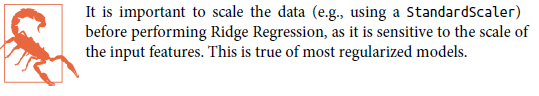

Here is how to perform Ridge Regression using Scikit-Learn:

In [13]:
from sklearn.linear_model import Ridge
lm_ridge = Ridge(alpha = 1, solver = "cholesky").fit(X, y)

print(lm_ridge.intercept_)
print(lm_ridge.coef_)

[3.95743108]
[[3.06903039]]


Using Stochastic Gradient Descent:

In [16]:
sgd_reg = SGDRegressor(penalty="l2").fit(X, y) # For Ridge Regression
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[3.52807503]
[3.4195748]


C:\Users\miqui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* = LASSO is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_{1}$ norm of the weight vector instead of half the square of the $l_{2}$ term.

**Lasso Regression cost function:**

$J(\theta) = MSE(\theta) + \alpha\sum\lvert{\theta_{i}}\rvert$

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (set them to $0$).

Here's an example of Lasso Regression in Scikit-Learn:

In [5]:
from sklearn.linear_model import Lasso
lasso_lm = Lasso(alpha=0.1).fit(X, y)
print(lasso_lm.intercept_)
print(lasso_lm.coef_)

[4.26129909]
[2.64442669]


### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio *r*. When $r=0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression.

So when should you use plain Linear Regression, Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.

Here is a short example of Elastic Net in Scikit-Learn: